In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#### Import Dataset

In [2]:
with open('./traffic-signs-data/train.p', mode='rb') as training_data:
    training_set = pickle.load(training_data)
with open('./traffic-signs-data/test.p', mode='rb') as test_data:
    test_set = pickle.load(test_data)
with open('./traffic-signs-data/valid.p', mode='rb') as validation_data:
    validation_set = pickle.load(validation_data)

In [3]:
traffic_sign_labels = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}


In [4]:
X_train, y_train = training_set['features'], training_set['labels']
X_test, y_test = test_set['features'], test_set['labels']
X_validate, y_validate = validation_set['features'], validation_set['labels']
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_test.shape

(12630, 32, 32, 3)

In [7]:
y_test.shape

(12630,)

In [8]:
X_validate.shape

(4410, 32, 32, 3)

In [9]:
y_validate.shape

(4410,)

#### Dataset Exploration

Label: Ahead only


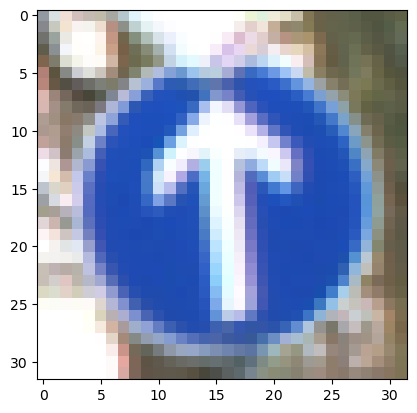

In [10]:
i = 20000
plt.imshow(X_train[i])
print("Label: {}".format(traffic_sign_labels[y_train[i]]))

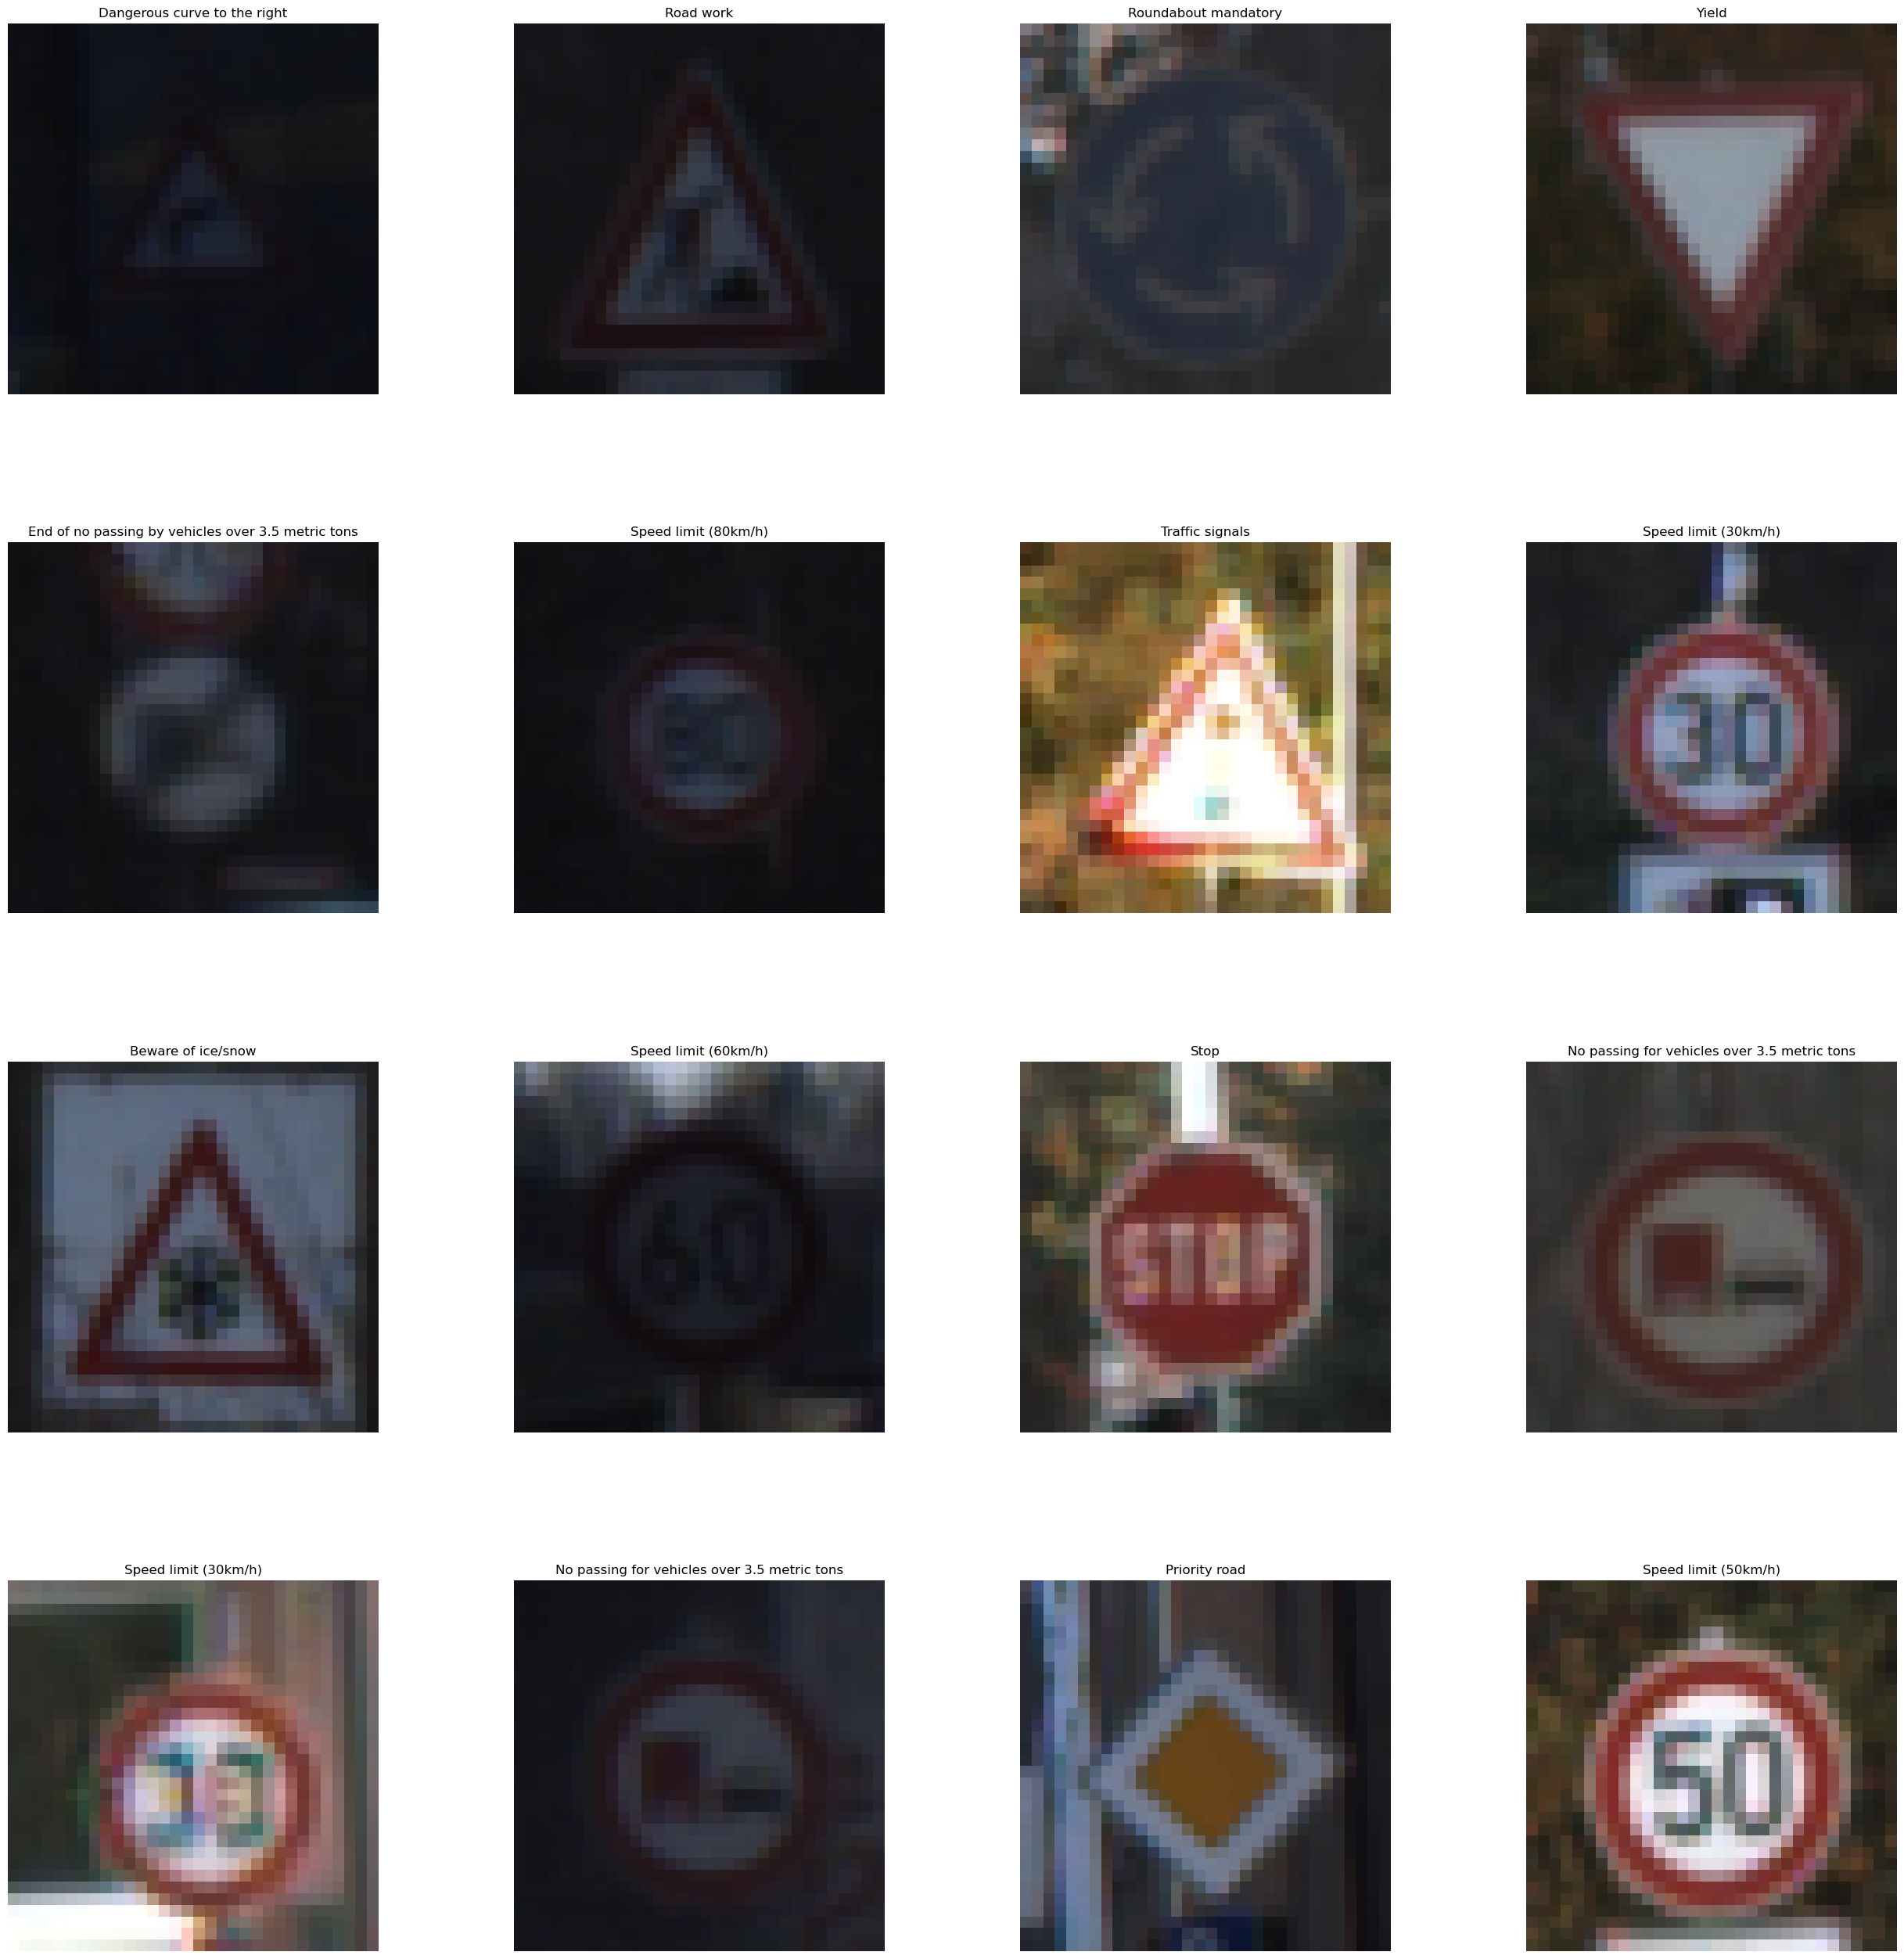

In [11]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (32, 32))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(traffic_sign_labels[y_train[index]])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [12]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#### Data Preprocessing
- Converting to grayscale
- Normalization

(34799, 32, 32, 1)


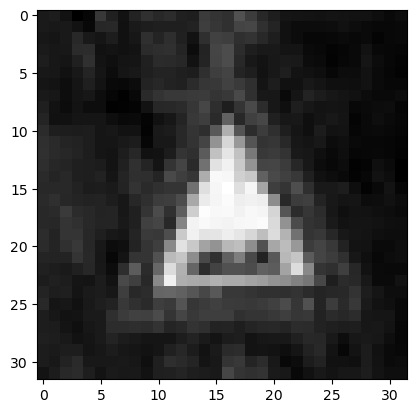

In [13]:
# convert image to grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validate/3, axis=3, keepdims=True) 

print(X_train_gray.shape)
plt.imshow(X_train_gray[i], cmap='gray')

(34799, 32, 32, 1)


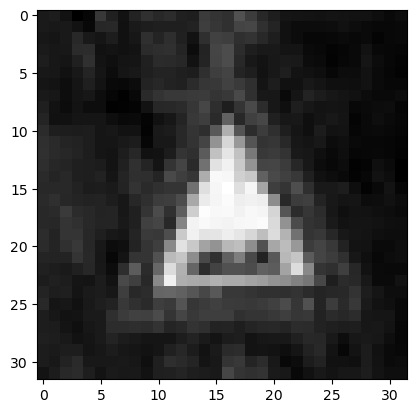

In [14]:
# Feature scaling - normalizing values
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

print(X_train_gray_norm.shape)
plt.imshow(X_train_gray_norm[i], cmap='gray')

#### Build the LeNet Model

In [15]:
from keras.models import Sequential
from keras.layers import AveragePooling2D, Conv2D, Dense, Flatten, Dropout

cnn = Sequential(
    layers=[
        Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape = (32, 32, 1)),
        AveragePooling2D(),
        Conv2D(filters=16, kernel_size=(5,5), activation='relu'),
        AveragePooling2D(),
        Flatten(),
        Dense(units=120, activation='relu'),
        Dense(units=84, activation='relu'),
        Dense(units=43, activation='softmax'),
    ]
)

In [16]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training the model

In [17]:
history = cnn.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=20,
                        verbose=1,
                        validation_data = (X_validation_gray_norm, y_validate))

Epoch 1/20


2024-08-19 11:39:39.002834: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


70/70 [==============================] - 3s 37ms/step - loss: 3.1202 - accuracy: 0.2140 - val_loss: 2.3602 - val_accuracy: 0.3819
Epoch 2/20
70/70 [==============================] - 2s 34ms/step - loss: 1.4109 - accuracy: 0.6053 - val_loss: 1.1973 - val_accuracy: 0.6689
Epoch 3/20
70/70 [==============================] - 2s 34ms/step - loss: 0.7940 - accuracy: 0.7827 - val_loss: 0.8783 - val_accuracy: 0.7404
Epoch 4/20
70/70 [==============================] - 3s 37ms/step - loss: 0.5646 - accuracy: 0.8495 - val_loss: 0.7662 - val_accuracy: 0.7707
Epoch 5/20
70/70 [==============================] - 3s 39ms/step - loss: 0.4435 - accuracy: 0.8838 - val_loss: 0.6619 - val_accuracy: 0.7971
Epoch 6/20
70/70 [==============================] - 3s 38ms/step - loss: 0.3617 - accuracy: 0.9063 - val_loss: 0.5931 - val_accuracy: 0.8290
Epoch 7/20
70/70 [==============================] - 3s 37ms/step - loss: 0.3104 - accuracy: 0.9198 - val_loss: 0.5936 - val_accuracy: 0.8306
Epoch 8/20
70/70 [======

In [18]:
y_pred = cnn.predict(X_test_gray_norm, batch_size=32)

395/395 [==============================] - 1s 1ms/step


In [19]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([16,  1, 38, ...,  1,  7, 10])

In [20]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

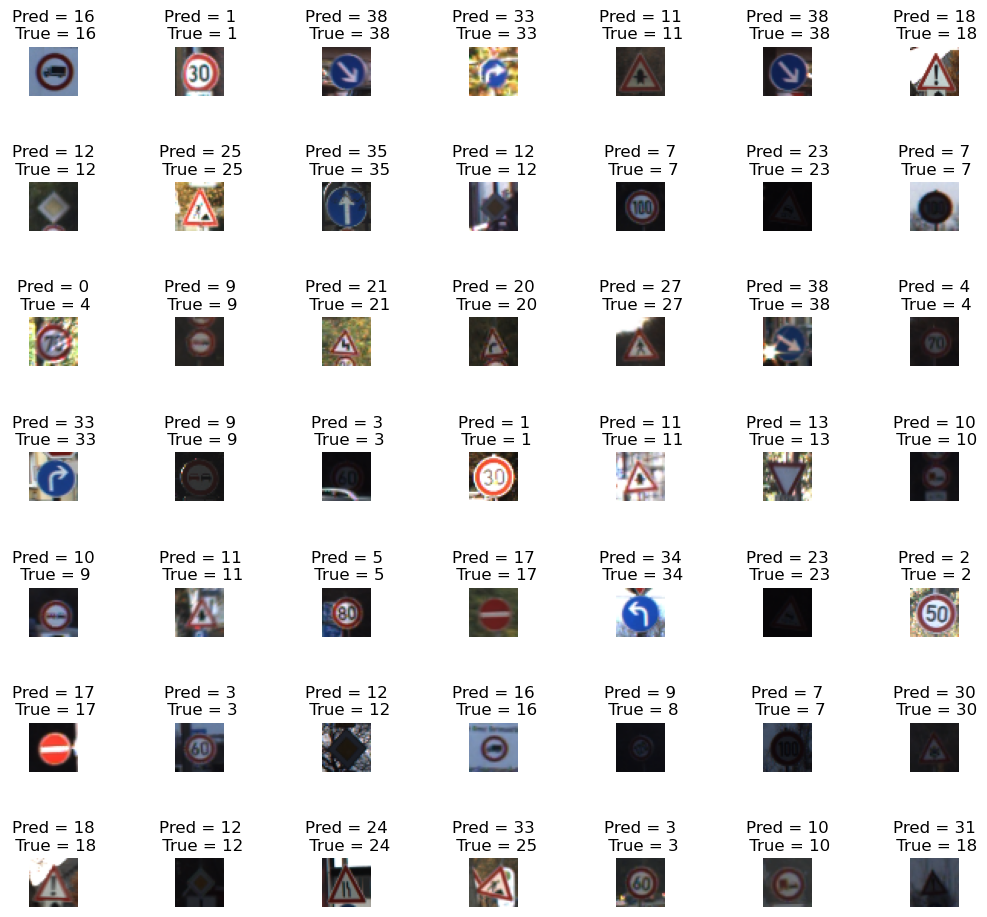

In [39]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Pred = {}\n True = {}'.format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 2) 

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = history.epoch

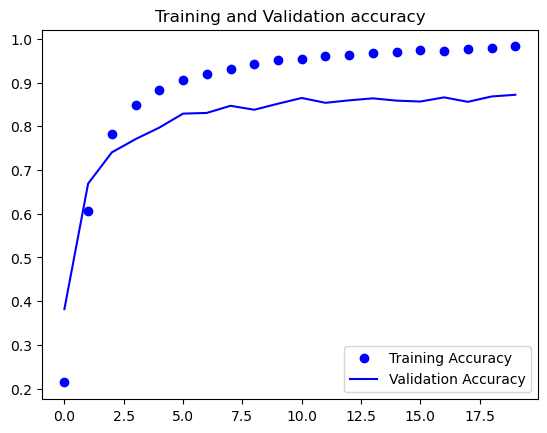

In [26]:
plt.plot(epochs, accuracy, 'bo', label="Training Accuracy")
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

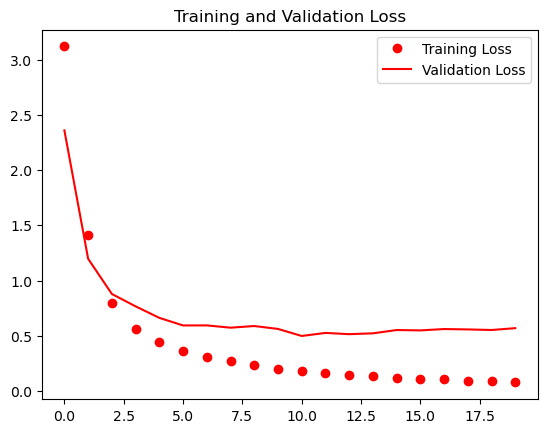

In [28]:
plt.plot(epochs, loss, 'ro', label="Training Loss")
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

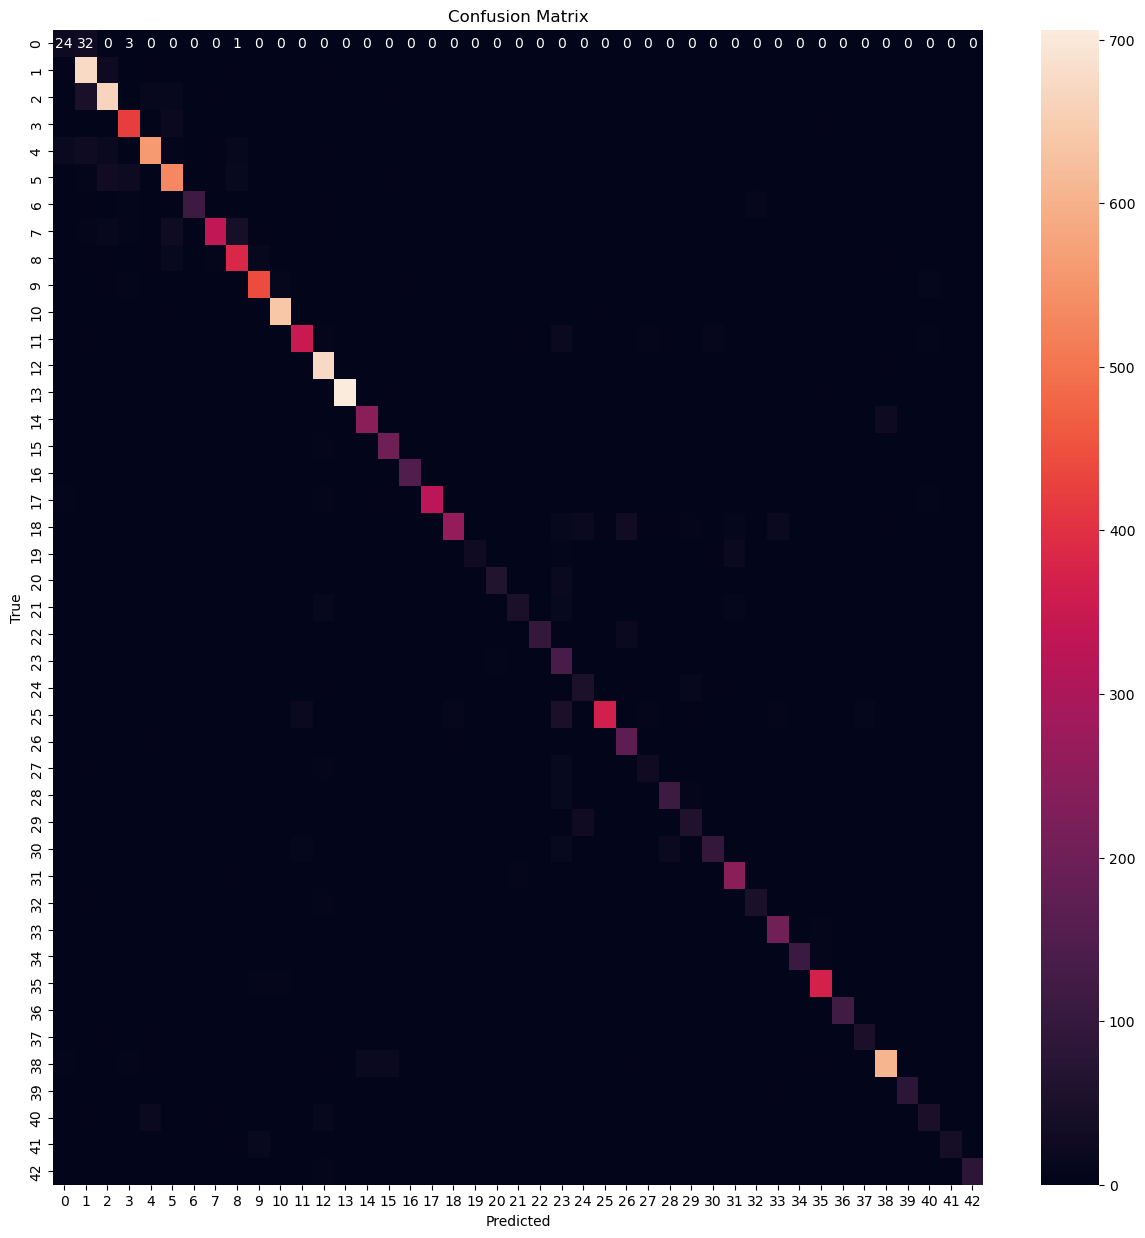

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15))  
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 10}) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()